In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_combined.csv', parse_dates=[['DATE','TIME']], keep_date_col=True)

In [3]:
df.columns = [column.strip() for column in df.columns]

In [4]:
df.shape
#df.columns
#df.head()
#df.info()
#df.isna()

(8736124, 12)

In [5]:
'''Check for duplicates:
df_turnstile = df.groupby(['C/A','UNIT','SCP','STATION','DATE_TIME']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending=False)
df_turnstile.head(5)'''

"Check for duplicates:\ndf_turnstile = df.groupby(['C/A','UNIT','SCP','STATION','DATE_TIME']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending=False)\ndf_turnstile.head(5)"

In [6]:
#remove duplicates
df.sort_values(['C/A','UNIT','SCP','STATION','DATE_TIME'], inplace=True, ascending=False)
df.drop_duplicates(subset=['C/A','UNIT','SCP','STATION','DATE_TIME'], inplace=True)

In [7]:
df['TIME'] = df['TIME'].str.replace(':','')

In [8]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
8736123,2021-01-29 20:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,200000,REGULAR,5554,544
8736122,2021-01-29 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,160000,REGULAR,5554,544
8736121,2021-01-29 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,120000,REGULAR,5554,544
8736120,2021-01-29 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,080000,REGULAR,5554,544
8736119,2021-01-29 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,040000,REGULAR,5554,544


In [9]:
df['TIME_INT'] = df.TIME.astype('int')
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INT
8736123,2021-01-29 20:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,200000,REGULAR,5554,544,200000
8736122,2021-01-29 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,160000,REGULAR,5554,544,160000
8736121,2021-01-29 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,120000,REGULAR,5554,544,120000
8736120,2021-01-29 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,080000,REGULAR,5554,544,80000
8736119,2021-01-29 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,040000,REGULAR,5554,544,40000


In [10]:
df.TIME_INT.dtype
mask = ((df['TIME_INT'] == 40000) | (df['TIME_INT'] == 80000) | (df['TIME_INT'] == 120000))
df = df[mask]

In [11]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INT
8736121,2021-01-29 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,120000,REGULAR,5554,544,120000
8736120,2021-01-29 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,080000,REGULAR,5554,544,80000
8736119,2021-01-29 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,040000,REGULAR,5554,544,40000
8736115,2021-01-28 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2021,120000,REGULAR,5554,544,120000
8736114,2021-01-28 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2021,080000,REGULAR,5554,544,80000


In [12]:
from datetime import datetime

In [13]:
df_year = datetime.strptime('2021-01-29 20:00:00', '%Y-%m-%d %H:%M:%S')
df_year

datetime.datetime(2021, 1, 29, 20, 0)

In [14]:
df['YEARS']=pd.DatetimeIndex(df['DATE']).year

In [15]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INT,YEARS
8736121,2021-01-29 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,120000,REGULAR,5554,544,120000,2021
8736120,2021-01-29 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,080000,REGULAR,5554,544,80000,2021
8736119,2021-01-29 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,040000,REGULAR,5554,544,40000,2021
8736115,2021-01-28 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2021,120000,REGULAR,5554,544,120000,2021
8736114,2021-01-28 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2021,080000,REGULAR,5554,544,80000,2021


In [16]:
turnstile_df = (df.groupby(['C/A','SCP','UNIT','STATION','DATE'], as_index = False).ENTRIES.first())

turnstile_df.head()

,C/A,SCP,UNIT,STATION,DATE,ENTRIES
0,A002,02-00-00,R051,59 ST,05/30/2020,7419911
1,A002,02-00-00,R051,59 ST,05/31/2020,7420018
2,A002,02-00-00,R051,59 ST,06/01/2020,7420118
3,A002,02-00-00,R051,59 ST,06/02/2020,7420285
4,A002,02-00-00,R051,59 ST,06/03/2020,7420449


In [17]:
turnstile_df[['PREV_DATE','PREV_ENTRIES']] = (turnstile_df.groupby(['C/A','SCP','UNIT','STATION'])[['DATE','ENTRIES']].apply(lambda x: x.shift(1)))

turnstile_df.dropna(subset=['PREV_ENTRIES'], axis=0, inplace=True)

turnstile_df.head()

,C/A,SCP,UNIT,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,02-00-00,R051,59 ST,05/31/2020,7420018,05/30/2020,7419911.0
2,A002,02-00-00,R051,59 ST,06/01/2020,7420118,05/31/2020,7420018.0
3,A002,02-00-00,R051,59 ST,06/02/2020,7420285,06/01/2020,7420118.0
4,A002,02-00-00,R051,59 ST,06/03/2020,7420449,06/02/2020,7420285.0
5,A002,02-00-00,R051,59 ST,06/04/2020,7420606,06/03/2020,7420449.0


In [18]:
turnstile_df[turnstile_df['ENTRIES'] < turnstile_df['PREV_ENTRIES']].head()

,C/A,SCP,UNIT,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
72,A002,02-00-00,R051,59 ST,08/10/2019,7163822,08/09/2020,7442474.0
74,A002,02-00-00,R051,59 ST,08/11/2019,7164455,08/10/2020,7442681.0
76,A002,02-00-00,R051,59 ST,08/12/2019,7165089,08/11/2020,7443133.0
78,A002,02-00-00,R051,59 ST,08/13/2019,7166204,08/12/2020,7443587.0
80,A002,02-00-00,R051,59 ST,08/14/2019,7167315,08/13/2020,7444052.0


In [19]:
(turnstile_df[turnstile_df['ENTRIES'] < turnstile_df['PREV_ENTRIES']].groupby(['C/A','SCP','UNIT','STATION']).size())

C/A    SCP       UNIT  STATION      
A002   02-00-00  R051  59 ST            21
       02-00-01  R051  59 ST            21
       02-03-00  R051  59 ST            21
       02-03-01  R051  59 ST            21
       02-03-02  R051  59 ST            21
                                        ..
TRAM2  00-00-00  R469  RIT-ROOSEVELT    83
       00-00-01  R469  RIT-ROOSEVELT    83
       00-03-00  R469  RIT-ROOSEVELT    83
       00-03-01  R469  RIT-ROOSEVELT    83
       00-05-00  R469  RIT-ROOSEVELT    83
Length: 4205, dtype: int64

In [20]:
def fix_reversed_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['ENTRIES'], row['PREV_ENTRIES'])
        return 0
    return counter

turnstile_df['DAILY_ENTRIES']=turnstile_df.apply(fix_reversed_counts, axis=1, max_counter = 1000000)

2390006 3591975.0
3592903 2390006.0
2393853 3592903.0
3594355 2393853.0
2397974 3594355.0
3595796 2397974.0
2404007 3595796.0
3597216 2404007.0
2410058 3597216.0
3598575 2410058.0
2416455 3598575.0
3599885 2416455.0
2422639 3599885.0
3600777 2422639.0
2427825 3600777.0
3601197 2427825.0
2432185 3601197.0
3602640 2432185.0
2436281 3602640.0
3604052 2436281.0
2442083 3604052.0
3605400 2442083.0
2448021 3605400.0
3606642 2448021.0
2453976 3606642.0
3607983 2453976.0
2459519 3607983.0
3609113 2459519.0
2464686 3609113.0
3610042 2464686.0
2469134 3610042.0
3611403 2469134.0
2473505 3611403.0
3612781 2473505.0
2479275 3612781.0
3614242 2479275.0
2485302 3614242.0
3615634 2485302.0
2491337 3615634.0
1562661238 10630.0
10698 1562661238.0
1562661238 10698.0
10780 1562661238.0
1562661238 10780.0
10938 1562661238.0
1562661238 10938.0
11112 1562661238.0
1562661238 11112.0
11270 1562661238.0
1562662152 11270.0
11445 1562662152.0
1562663317 11445.0
11590 1562663317.0
1562664588 11590.0
11679 1562664

In [21]:
turnstile_df.head()

,C/A,SCP,UNIT,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,02-00-00,R051,59 ST,05/31/2020,7420018,05/30/2020,7419911.0,107.0
2,A002,02-00-00,R051,59 ST,06/01/2020,7420118,05/31/2020,7420018.0,100.0
3,A002,02-00-00,R051,59 ST,06/02/2020,7420285,06/01/2020,7420118.0,167.0
4,A002,02-00-00,R051,59 ST,06/03/2020,7420449,06/02/2020,7420285.0,164.0
5,A002,02-00-00,R051,59 ST,06/04/2020,7420606,06/03/2020,7420449.0,157.0


In [22]:
station_sum_df = turnstile_df.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
station_sum_df = station_sum_df.head(10)

In [23]:
'''station_mean_df = turnstile_df.groupby(['STATION'])[['DAILY_ENTRIES']].mean().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
station_mean_df = station_mean_df.head()'''

"station_mean_df = turnstile_df.groupby(['STATION'])[['DAILY_ENTRIES']].mean().sort_values('DAILY_ENTRIES', ascending=False).reset_index()\nstation_mean_df = station_mean_df.head()"

In [24]:
station_mask = ((turnstile_df.STATION == '14 ST-UNION SQ') | (turnstile_df.STATION == '23 ST') | (turnstile_df.STATION == 'CANAL ST') | (turnstile_df.STATION == 'GRD CNTRL-42 ST') | (turnstile_df.STATION == 'FULTON ST') | (turnstile_df.STATION == '34 ST-PENN STA') | (turnstile_df.STATION == '125 ST') | (turnstile_df.STATION == '96 ST') | (turnstile_df.STATION == '86 ST') | (turnstile_df.STATION == '116 ST'))
station_mean_mask = turnstile_df[station_mask]
station_mean_mask.groupby(['STATION'])[['DAILY_ENTRIES']].mean().sort_values('DAILY_ENTRIES',ascending=False).reset_index()

,STATION,DAILY_ENTRIES
0,14 ST-UNION SQ,263986.451888
1,116 ST,229449.465485
2,96 ST,202289.929004
3,125 ST,191554.220194
4,CANAL ST,147001.420051
5,23 ST,127863.404686
6,FULTON ST,127715.688950
7,GRD CNTRL-42 ST,108882.761695
8,86 ST,101705.940839
9,34 ST-PENN STA,92121.434706


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

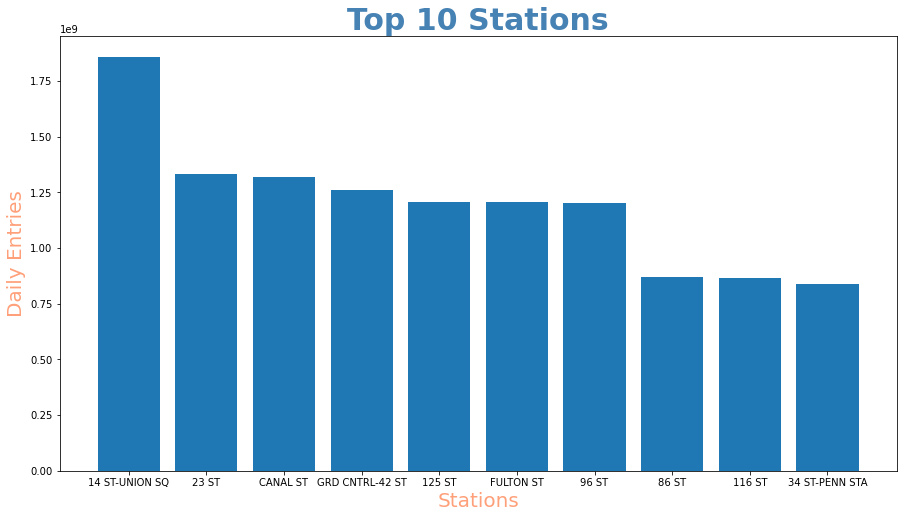

In [26]:
x = station_sum_df['STATION']
y = station_sum_df['DAILY_ENTRIES']
plt.figure(figsize = [15,8])
plt.bar(x,y)
plt.title('Top 10 Stations', fontsize = 30, weight = 'bold', color = 'steelblue')
plt.xlabel('Stations', fontsize = 20, color = 'lightsalmon')
plt.ylabel('Daily Entries', fontsize = 20, color = 'lightsalmon')
plt.savefig("Top_Stations_Bar_Chart.png")

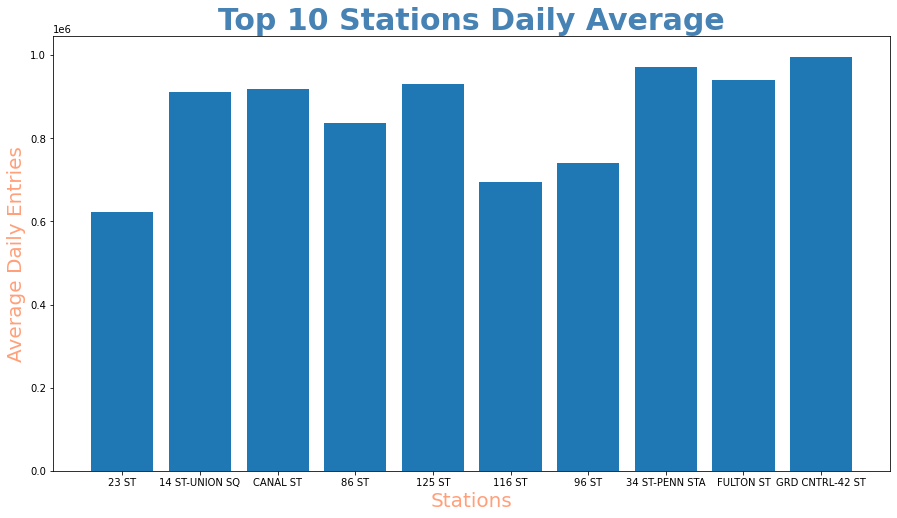

In [27]:
x = station_mean_mask['STATION']
y = station_mean_mask['DAILY_ENTRIES']
plt.figure(figsize = [15,8])
plt.bar(x,y)
plt.title('Top 10 Stations Daily Average', fontsize = 30, weight = 'bold', color = 'steelblue')
plt.xlabel('Stations', fontsize = 20, color = 'lightsalmon')
plt.ylabel('Average Daily Entries', fontsize = 20, color = 'lightsalmon')
plt.savefig("Top_Stations_Average_Bar_Chart.png")

In [28]:
turnstile_df_year = (df.groupby(['C/A','SCP','UNIT','STATION','DATE','YEARS'], as_index = False).ENTRIES.first())

In [29]:
turnstile_df_year.head()

,C/A,SCP,UNIT,STATION,DATE,YEARS,ENTRIES
0,A002,02-00-00,R051,59 ST,05/30/2020,2020,7419911
1,A002,02-00-00,R051,59 ST,05/31/2020,2020,7420018
2,A002,02-00-00,R051,59 ST,06/01/2020,2020,7420118
3,A002,02-00-00,R051,59 ST,06/02/2020,2020,7420285
4,A002,02-00-00,R051,59 ST,06/03/2020,2020,7420449


In [30]:
turnstile_df_year[['PREV_DATE','PREV_ENTRIES']] = (turnstile_df_year.groupby(['C/A','SCP','UNIT','STATION','YEARS'])[['DATE','ENTRIES']].apply(lambda x: x.shift(1)))

In [31]:
turnstile_df_year.dropna(subset=['PREV_ENTRIES'], axis=0, inplace=True)

In [32]:
turnstile_df_year.head()

,C/A,SCP,UNIT,STATION,DATE,YEARS,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,02-00-00,R051,59 ST,05/31/2020,2020,7420018,05/30/2020,7419911.0
2,A002,02-00-00,R051,59 ST,06/01/2020,2020,7420118,05/31/2020,7420018.0
3,A002,02-00-00,R051,59 ST,06/02/2020,2020,7420285,06/01/2020,7420118.0
4,A002,02-00-00,R051,59 ST,06/03/2020,2020,7420449,06/02/2020,7420285.0
5,A002,02-00-00,R051,59 ST,06/04/2020,2020,7420606,06/03/2020,7420449.0


In [33]:
turnstile_df_year[turnstile_df_year['ENTRIES'] < turnstile_df_year['PREV_ENTRIES']].head()

,C/A,SCP,UNIT,STATION,DATE,YEARS,ENTRIES,PREV_DATE,PREV_ENTRIES
2935,A011,01-03-00,R080,57 ST-7 AV,05/31/2020,2020,885664845,05/30/2020,885664900.0
2936,A011,01-03-00,R080,57 ST-7 AV,06/01/2020,2020,885664788,05/31/2020,885664845.0
2937,A011,01-03-00,R080,57 ST-7 AV,06/02/2020,2020,885664675,06/01/2020,885664788.0
2938,A011,01-03-00,R080,57 ST-7 AV,06/03/2020,2020,885664585,06/02/2020,885664675.0
2939,A011,01-03-00,R080,57 ST-7 AV,06/04/2020,2020,885664471,06/03/2020,885664585.0


In [34]:
(turnstile_df_year[turnstile_df_year['ENTRIES'] < turnstile_df_year['PREV_ENTRIES']].groupby(['C/A','SCP','UNIT','STATION']).size())

C/A    SCP       UNIT  STATION        
A011   01-03-00  R080  57 ST-7 AV         109
A015   00-03-01  R081  49 ST                1
A025   01-03-01  R023  34 ST-HERALD SQ    119
A030   01-00-00  R083  23 ST                1
A034   03-03-00  R170  14 ST-UNION SQ       1
                                         ... 
R647   02-05-00  R110  FLATBUSH AV-B.C      1
       02-05-01  R110  FLATBUSH AV-B.C      1
R729   00-00-01  R292  BAYCHESTER AV        1
R730   00-00-04  R431  EASTCHSTER/DYRE    168
TRAM1  00-00-01  R468  RIT-MANHATTAN        1
Length: 465, dtype: int64

In [35]:
def fix_reversed_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['ENTRIES'], row['PREV_ENTRIES'])
        return 0
    return counter

turnstile_df_year['DAILY_ENTRIES']=turnstile_df_year.apply(fix_reversed_counts, axis=1, max_counter = 1000000)

46047 6163823.0
33911 1237353216.0
645 3846968.0
46035 1201182.0
28 3963035.0
5072 6765036.0
32 2172421.0
110 3039886.0
453 4676334.0
109 6956175.0
6956542 109.0
11766 3335609.0
19391 1053843.0
84869 6602460.0
4677 2411831.0
24401 1174922.0
51 1178936.0
1490 1192166.0
262221 6626972.0
5309734 100663510.0
458778 68447940.0
2073696 367177.0
30113 1598860.0
5643 1258371.0
607866 6788704.0
223936519 167066.0
348 6495297.0
11 2029641260.0
38638 6695047.0
1560308428 6140951.0
393350 118199871.0
6 1029725.0
301 2822848.0
121 4971113.0
34108 8304680.0
475782473 7330853.0
97 475738650.0
530927 3117047.0
722997 2631464.0
5177419 17134429.0
1224 1455082.0
20644 2289529.0
11161 1868412.0
26598 8087776.0
656827 9127113.0
1136701788 6435560.0
16936 3140654.0
621547 1892774.0
279 4038371.0
172255355 8728581.0
37167 3953593.0
22730 2607082.0
68039 3470072.0
163 2210093.0
423 3563454.0
12377 3012412.0
66213 11981262.0
107 8291510.0
15861 6171258.0
7290 1121323112.0
6666 2025858215.0
14652 4688121.0
573

In [36]:
turnstile_df_year.head()

,C/A,SCP,UNIT,STATION,DATE,YEARS,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,02-00-00,R051,59 ST,05/31/2020,2020,7420018,05/30/2020,7419911.0,107.0
2,A002,02-00-00,R051,59 ST,06/01/2020,2020,7420118,05/31/2020,7420018.0,100.0
3,A002,02-00-00,R051,59 ST,06/02/2020,2020,7420285,06/01/2020,7420118.0,167.0
4,A002,02-00-00,R051,59 ST,06/03/2020,2020,7420449,06/02/2020,7420285.0,164.0
5,A002,02-00-00,R051,59 ST,06/04/2020,2020,7420606,06/03/2020,7420449.0,157.0


In [37]:
station_mask = ((turnstile_df_year.STATION == '14 ST-UNION SQ') | (turnstile_df_year.STATION == '23 ST') | (turnstile_df_year.STATION == 'CANAL ST') | (turnstile_df_year.STATION == 'GRD CNTRL-42 ST') | (turnstile_df_year.STATION == 'FULTON ST') | (turnstile_df_year.STATION == '34 ST-PENN STA') | (turnstile_df_year.STATION == '125 ST') | (turnstile_df_year.STATION == '96 ST') | (turnstile_df_year.STATION == '86 ST') | (turnstile_df_year.STATION == '116 ST'))
station_mask = turnstile_df_year[station_mask]
station_2020_mask = (station_mask.YEARS == 2020)
station_2020_mask = station_mask[station_2020_mask]
station_2020_mask.groupby(['STATION','YEARS'])[['DAILY_ENTRIES']].mean().sort_values('DAILY_ENTRIES',ascending=False).reset_index()

,STATION,YEARS,DAILY_ENTRIES
0,14 ST-UNION SQ,2020,2954.831010
1,116 ST,2020,2894.635823
2,96 ST,2020,2182.137212
3,125 ST,2020,1742.332978
4,CANAL ST,2020,1451.922478
5,FULTON ST,2020,1450.313275
6,GRD CNTRL-42 ST,2020,1177.575499
7,23 ST,2020,1073.489478
8,86 ST,2020,773.905710
9,34 ST-PENN STA,2020,505.634097


In [38]:
station_mask = ((turnstile_df_year.STATION == '14 ST-UNION SQ') | (turnstile_df_year.STATION == '23 ST') | (turnstile_df_year.STATION == 'CANAL ST') | (turnstile_df_year.STATION == 'GRD CNTRL-42 ST') | (turnstile_df_year.STATION == 'FULTON ST') | (turnstile_df_year.STATION == '34 ST-PENN STA') | (turnstile_df_year.STATION == '125 ST') | (turnstile_df_year.STATION == '96 ST') | (turnstile_df_year.STATION == '86 ST') | (turnstile_df_year.STATION == '116 ST'))
station_mask = turnstile_df_year[station_mask]
station_2019_mask = (station_mask.YEARS == 2019)
station_2019_mask = station_mask[station_2019_mask]
station_2019_mask.groupby(['STATION','YEARS'])[['DAILY_ENTRIES']].mean().sort_values('DAILY_ENTRIES',ascending=False).reset_index()

,STATION,YEARS,DAILY_ENTRIES
0,34 ST-PENN STA,2019,4312.969810
1,GRD CNTRL-42 ST,2019,2942.780290
2,125 ST,2019,2817.868562
3,86 ST,2019,2751.890584
4,23 ST,2019,2642.966633
5,14 ST-UNION SQ,2019,2095.959528
6,96 ST,2019,1796.485549
7,CANAL ST,2019,1724.574651
8,116 ST,2019,1540.549882
9,FULTON ST,2019,1068.508075


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

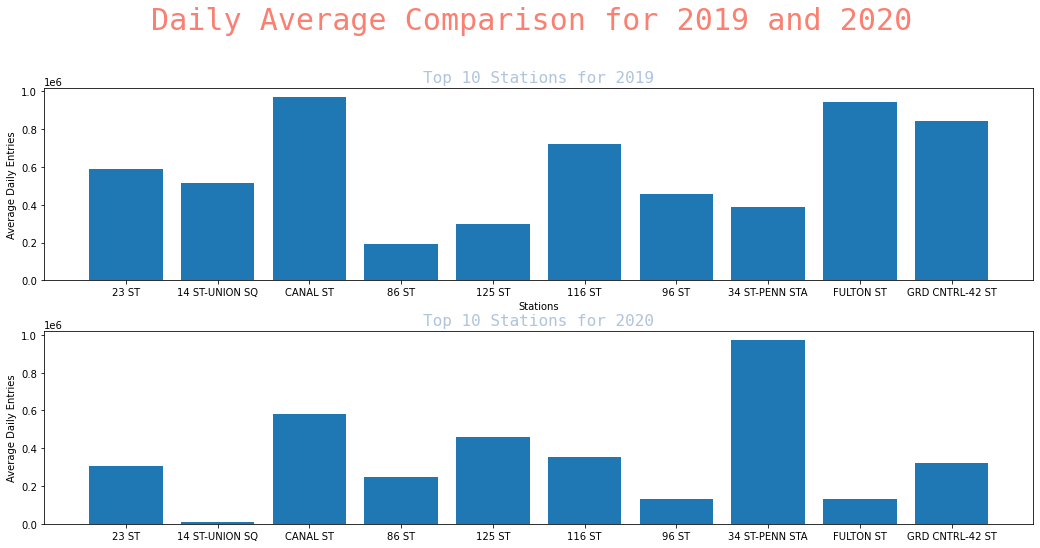

In [41]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
plt.suptitle('Daily Average Comparison for 2019 and 2020', fontsize = 30, family = 'monospace', color = 'salmon')
fig.tight_layout(pad=3.0)

x = station_2019_mask['STATION']
y = station_2019_mask['DAILY_ENTRIES']
ax[1].bar(x,y)
ax[1].set_title('Top 10 Stations for 2020', fontsize = 16, family = 'monospace', color = 'lightsteelblue')
ax[1].set(ylabel = 'Average Daily Entries')

x_2 = station_2020_mask['STATION']
y_2 = station_2020_mask['DAILY_ENTRIES']

ax[0].bar(x_2,y_2)
ax[0].set_title('Top 10 Stations for 2019', fontsize = 16, family = 'monospace', color = 'lightsteelblue')
ax[0].set(xlabel = 'Stations')
ax[0].set(ylabel = 'Average Daily Entries')
plt.savefig("2019_2020_Average_Chart.png")
#print(type(station_2020_mask))